In [1]:
from __future__ import annotations

import json
import os
from typing import Literal

import numpy as np
import matplotlib.pyplot as plt


os.makedirs("../figs/", exist_ok=True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams['mathtext.fontset'] = 'stix'  # The setting of math font

dist_dict = {
    "random": "Uniform",
    "exponential": "Exponential",
    "pareto": "Pareto",
    "lognormal": "Log Normal",
}

In [52]:
def plot_cumtime(ax: plt.Axes, dist: str, target: str):
    cumtimes = json.load(open(f"../validation-results/order-match-{target}-cumtime.json"))[dist]
    ans = np.array(cumtimes["answer"])
    sim = np.array(cumtimes["simulated"])[:ans.size]
    dx = np.arange(ans.size) + 1
    line1, = ax.plot(dx, ans, ds="steps-post", color="black", lw=2)
    line2, = ax.plot(dx, sim, ds="steps-post", linestyle="dotted", color="red", lw=2)
    ax.grid()

    abs_diff = np.abs(sim - ans) * 1000
    line3, = ax.plot(dx, abs_diff, ds="steps-post", linestyle="dashed", color="blue", lw=2)
    ax.set_title(f"{dist_dict[dist]}")
    ax.set_xlim(1, ans.size)
    ax.set_ylim(1.0, 700)
    ax.set_yscale("log")
    ax.grid(which='minor', color='gray', linestyle=':')
    ax.grid(which='major', color='black')
    return [line1, line2, line3]


def plot_target(target: str):
    fig, axes = plt.subplots(
        ncols=2,
        nrows=2,
        sharex=True,
        sharey=True,
        figsize=(10, 5),
        gridspec_kw=dict(hspace=0.22, wspace=0.03),
    )

    for i, k in enumerate(dist_dict):
        r, c = i // 2, i % 2
        ax = axes[r][c]
        lines = plot_cumtime(ax, dist=k, target=target)

    axes[-1][0].legend(
        handles=lines,
        loc='upper center',
        labels=["Naïve", "Our Wrapper", "Abs. Difference $\\times 10^3$"],
        fontsize=18,
        bbox_to_anchor=(1.02, -0.4),  # ここは調整が必要です
        fancybox=False,
        ncol=len(lines)
    )
    fig.supxlabel("# of Evaluations", y=-0.03)
    fig.supylabel("Simulated Runtime $\min~T_p^{(N)}$", x=0.03)
    plt.savefig(f"../figs/cumtime-match-{target}.pdf", bbox_inches="tight")

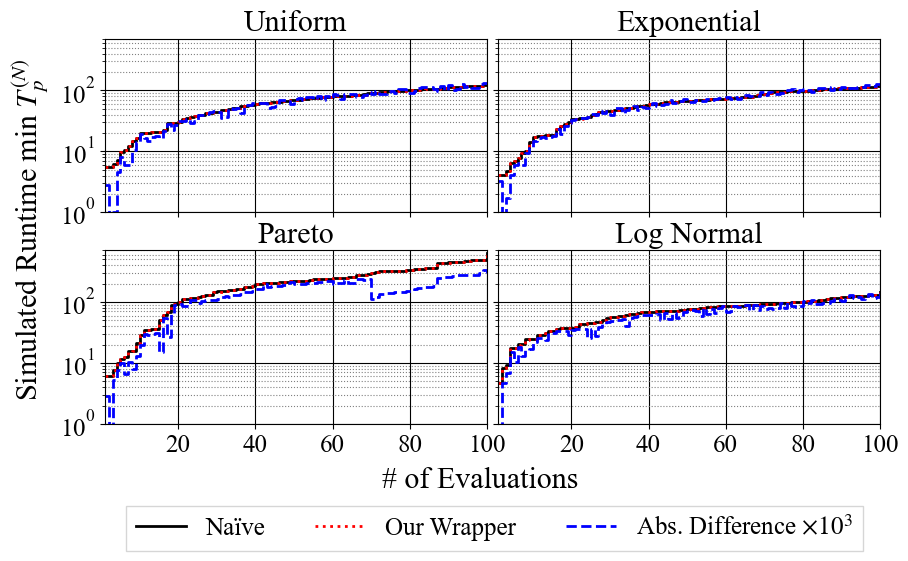

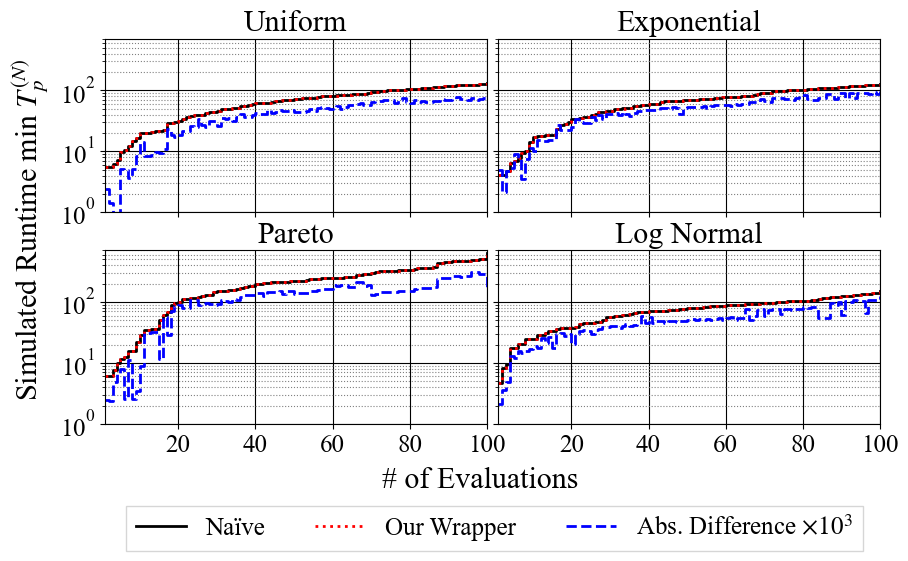

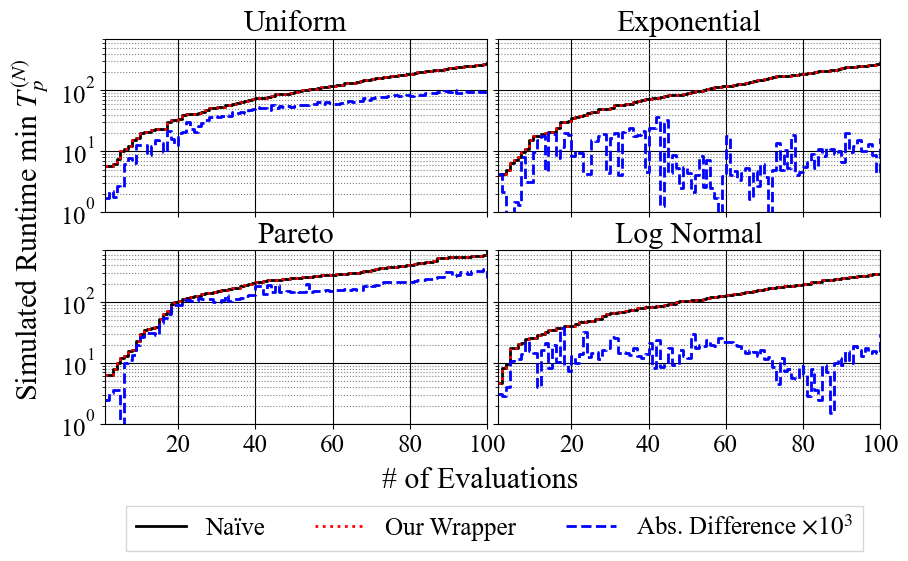

In [53]:
plot_target("cheap")
plot_target("bit-expensive")
plot_target("expensive")